## Моделирование молекулярной динамики

   - Система: ГЦК решётка $7\times7\times7$ частиц;
   - Постоянная решётки: $a = 1.75~\sigma $;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Начальная температура: $T_i = 10^{-10}~\varepsilon / k_B$;
   - Конечная температура: $T_f = 2.8~\varepsilon / k_B$;
   - Скорость охлаждения: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число шагов для охлаждения: 40000;
   - Функция радиального распределения рассчитывалась через каждые 5000 шагов;
   - Подсчёт состоял из 1500 шагов: 500 на уравновешивание системы при фиксированной температуре и 1000 на усреднение по времени;

#### Импорт необходимых библиотек

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('seaborn')

#### Путь к файлам с данными

In [2]:
BASE_DIRECTORY = os.path.dirname(os.getcwd())
PATH_TO_ALL_DATA = os.path.join(BASE_DIRECTORY, 'data')
PATH_TO_CURRENT_DATA = os.path.join(PATH_TO_ALL_DATA, '2020-12-17')

In [3]:
rdf_filename = os.path.join(PATH_TO_CURRENT_DATA, 'rdf_file_T_')
parameters_filename = os.path.join(PATH_TO_CURRENT_DATA, 'system_parameters.csv')

#### Температуры, для которых была подчитана функция радиального распределения

In [4]:
temperatures = (
    0.10002, 
    0.49931, 
    1.00191, 
    1.50237, 
    2.00237, 
    2.49614, 
    2.79093, 
    2.80224,
)

#### Извлечение значений функции радиального распределения из файлов

In [5]:
rdf_data = pd.DataFrame(columns=['radius'])

for temperature in temperatures:
    df = pd.read_csv(
        f'{rdf_filename}{temperature:.5f}.csv',
        sep=';',
    )
    rdf_data = rdf_data.merge(
        right=df,
        how='outer',
        on='radius',
    )
    rdf_data = rdf_data.rename(columns={'rdf': f'{temperature:.5f}'})
    
rdf_data

,radius,0.10002,0.49931,1.00191,1.50237,2.00237,2.49614,2.79093,2.80224
0,0.005,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08,5.855646e+08
1,0.015,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.025,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.035,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.045,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
608,6.085,9.414707e-01,9.731187e-01,1.000479e+00,9.999173e-01,1.000280e+00,9.992445e-01,1.001745e+00,9.996092e-01
609,6.095,9.441973e-01,9.711193e-01,9.998739e-01,9.990902e-01,1.000761e+00,9.993007e-01,1.001486e+00,9.995768e-01
610,6.105,9.452342e-01,9.651224e-01,1.001334e+00,9.997235e-01,1.001824e+00,9.975292e-01,9.997711e-01,1.001729e+00
611,6.115,9.430164e-01,9.637868e-01,9.992920e-01,9.999126e-01,1.001709e+00,9.985846e-01,9.996582e-01,1.000528e+00


#### Графики функций радиального распределения при различных температурах

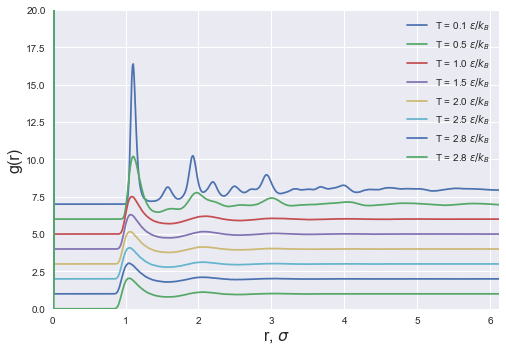

In [6]:
for i, temperature in enumerate(temperatures):
    plt.plot(
        rdf_data['radius'],
        rdf_data[f'{temperature:.5f}'] + 1 * (len(temperatures) - (i + 1)), 
        label=f'T = {temperature:.1f} $\epsilon / k_B $',
    );
    
plt.xlabel('r, $\sigma$', fontsize=16);
plt.ylabel('g(r)', fontsize=16);
plt.xlim(left=0, right=6.125);
plt.ylim(bottom=0, top=20);
plt.legend();

#### Извлечение параметров системы из файла

In [7]:
system_parameters = pd.read_csv(parameters_filename, sep=';')

for column in system_parameters.columns:
    system_parameters[column] = system_parameters[column].round(5)

system_parameters

,temperature,pressure,kinetic_energy,potential_energy,total_energy
0,0.00000,-2.93926,0.00000,-7985.80648,-7985.80648
1,0.00010,-2.93916,0.20580,-7985.07855,-7984.87275
2,0.00020,-2.93908,0.41149,-7985.08199,-7984.67050
3,0.00030,-2.93901,0.61695,-7985.07877,-7984.46182
4,0.00040,-2.93892,0.82219,-7985.08520,-7984.26301
...,...,...,...,...,...
39995,2.79506,4.62244,5752.23598,-4969.18253,783.05345
39996,2.79379,4.63922,5749.61152,-4956.51182,793.09970
39997,2.79349,4.65133,5749.00893,-4946.91877,802.09017
39998,2.79543,4.65258,5753.00238,-4946.53638,806.46600


In [8]:
times = (system_parameters.index + 1) * 0.005

#### Зависимость температуры системы от времени

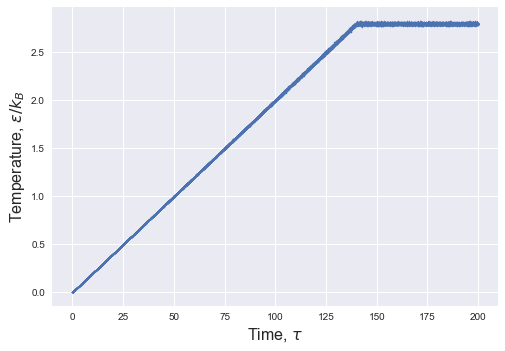

In [9]:
plt.scatter(
    times,
    system_parameters['temperature'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Temperature, $\epsilon / k_B$', fontsize=16);

plt.ylim(
#     bottom=2.75,
#     top=2.85,
);

#### Зависимость давления системы от времени

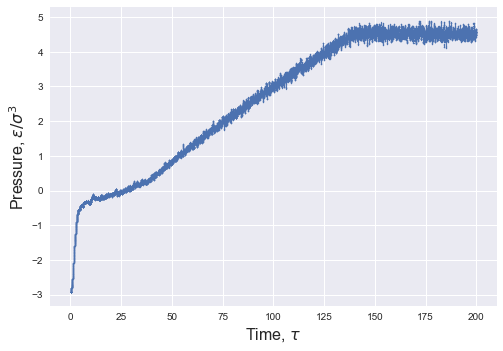

In [10]:
plt.scatter(
    times,
    system_parameters['pressure'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Pressure, $\epsilon / \sigma^3 $', fontsize=16);

plt.ylim(
#     bottom=3.5,
#     top=5.5,
);

#### Зависимость кинетической энергии системы от времени

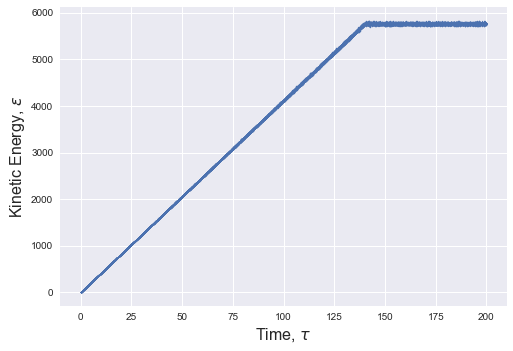

In [11]:
plt.scatter(
    times,
    system_parameters['kinetic_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Kinetic Energy, $\epsilon$', fontsize=16);

# plt.ylim(
#     bottom=-6000,
#     top=4000,
# );

#### Зависимость потенциальной энергии системы от времени

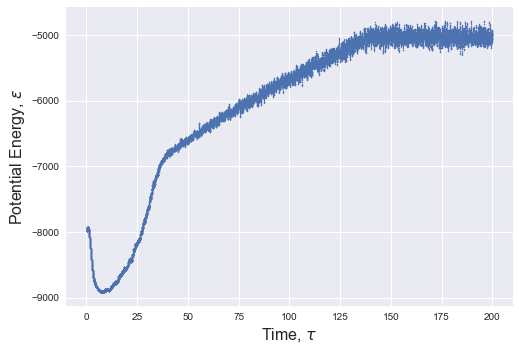

In [12]:
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Potential Energy, $\epsilon$', fontsize=16);

plt.ylim(
#     bottom=-6000,
#     top=4000,
);

#### Зависимость полной энергии системы от времени

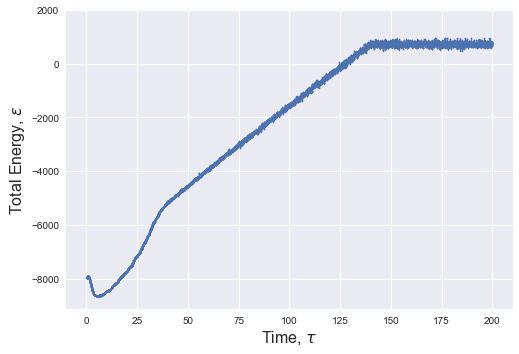

In [13]:
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
);
plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Total Energy, $\epsilon$', fontsize=16);

plt.ylim(
#     bottom=-6000,
    top=2000,
);

#### Энергии на одном графике

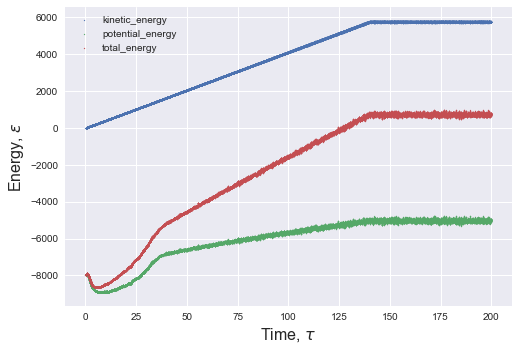

In [14]:
plt.scatter(
    times,
    system_parameters['kinetic_energy'],
    s=1,
    label='kinetic_energy',
);
plt.scatter(
    times,
    system_parameters['potential_energy'],
    s=1,
    label='potential_energy',
);
plt.scatter(
    times,
    system_parameters['total_energy'],
    s=1,
    label='total_energy',
);

plt.xlabel(r'Time, $\tau$', fontsize=16);
plt.ylabel(r'Energy, $\epsilon$', fontsize=16);
plt.legend();

plt.ylim(
#     bottom=-6000,
#     top=2000,
);